<a href="https://colab.research.google.com/github/AndriiFedorchuk/Machine-learning-course/blob/master/Gender_prediction_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main assumptions

The purpose of this project is to train the neural network, which, based on the hobby and the interests of the person, will guess its gender.

It is worth saying that the author of the project does NOT believe that certain interests and hobbies are inherent only in men or only women, just as he does not support the view that certain hobbies are pure "male" or "female".

The author also respects people's right to self-identification, including gender one. The division of people into two genders was chosen only due to the fact, that the corresponding division was presented in the data set from which the author took the main data.

The author of the project only believes that in 2022, there are still some factors that encourage people to choose their interests in such a way that there is a statistically significant difference between the interests of genders. These factors include, but are not limited to:
- traditional education
- the influence of people with traditional views
- society's expectation that a person will behave according to his / her / their gender role
- the effect of hormones (in particular testosterone stimulates interest in competitiveness and cruelty)
- etc.

Based on all of the above, the author believes that in 2020 it is impossible to guess the gender of a person with 100% accuracy, based only on his/her/their interests and hobbies, but thinks that it is quite possible to expect a prediction accuracy at the order of 70-85%.

# Data importing

To begin with, we import the basic tools and the main file. The file is in .swc format and was manually created by the author based on an open-source data set.

[https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv](https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv)

The number of parameters was reduced from 150 to 33, of which 32 are hobbies and interests of the person, and 1 for the corresponding gender.

In order to simplify my task I marked genders with numbers:
0 - male
1 - female

In [139]:
import numpy as np
import pandas as pd

URL = 'https://raw.githubusercontent.com/AndriiFedorchuk/Andrii/master/main_fa.csv'    
dataset = pd.read_csv(URL)                                                             
dataset.head(10)

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Gender
0,1,5,1,3,3,5,3,5,3,3,...,5,5,1,4,4,2,5,4,4,1
1,1,3,4,5,2,4,4,5,1,1,...,1,1,2,3,3,2,4,2,5,1
2,1,2,1,5,2,4,2,4,1,1,...,2,1,1,4,2,5,5,5,5,1
3,4,4,5,4,1,3,1,2,3,3,...,1,1,2,4,3,1,2,1,1,1
4,3,2,3,2,2,2,2,2,3,3,...,1,4,3,3,3,2,4,2,1,1
5,5,3,4,2,3,4,4,1,4,4,...,4,2,1,2,3,1,3,3,2,0
6,3,3,1,1,1,2,1,3,5,5,...,3,3,1,3,4,3,5,1,5,1
7,5,2,3,1,1,5,4,1,2,2,...,5,1,3,3,2,2,4,2,5,0
8,3,2,1,1,1,1,1,1,3,1,...,1,1,5,2,1,5,4,1,1,1
9,3,2,3,3,1,5,1,4,2,1,...,4,1,2,4,3,5,5,2,2,1


So let's start. 
Please choose on a scale from 1 to 5 how much do You like the next activities:

In [140]:
from IPython. display import clear_output

def check_valid(parameter, out_list, num):
  answer = input(f"Question {num+1}/32 - {parameter}: ")
  try:
    num = int(answer)
    if num in range(1,6):
      out_list.append(num)
    else:
      raise ValueError
  except (TypeError, ValueError):
      print("Please input integer in the range from 1 to 5")
      check_valid(parameter, out_list, num)  

def do_test():
  columns, user_rates = list(dataset.columns[:32]), []
  for col in columns:
      clear_output(wait=True)
      check_valid(col, user_rates, columns.index(col))    
  return user_rates

def question_do_test():
  if_test = input('Do You want to take a test? (y/n):')
  if not if_test in ('y', 'n'):
    print('Please print one of the oprions \'y\' for YES or \'n\' for NO')
    return question_do_test()
  elif if_test == 'n':
    print('Calculations will be done for developer\'s answers')
    user_rates = [4, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 3, 4, 3, 2, 2, 
                  2, 3, 5, 2, 2, 3, 4, 4, 3, 2, 2, 5, 2, 5, 3, 5]
    return user_rates
  else:
    return do_test()

print('Please, give Your answer on the 32 following questions.\n \
Rate Your interest in a given activias on the scale from 1 to 5, where:\n \
1 - You are not interested in this topic at all\n \
5 - You are very interested in this topic\n')

user_rates = question_do_test()
user_data = np.reshape(np.array(user_rates), (1, 32))

Please, give Your answer on the 32 following questions.
 Rate Your interest in a given activias on the scale from 1 to 5, where:
 1 - You are not interested in this topic at all
 5 - You are very interested in this topic

Do You want to take a test? (y/n):n
Calculations will be done for developer's answers


# Dividing the datasheet

Here I divided a dataset into two parts.

All interests and hobbies I marked as x (my input) and gender as y (my output).

Also, I divided all data into training data (80%) and testing data (20%).


In [141]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:,:32].values
y = dataset.iloc[:,32].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# print info about a shape of arrays
print(x_train.shape, 'train samples for parameters')
print(y_train.shape, 'train samples for output - Gender \n')

print(x_test.shape, 'test samples  for parameters')
print(y_test.shape, 'test samples for output - Gender \n')

print(user_data.shape, 'user input data')

(800, 32) train samples for parameters
(800,) train samples for output - Gender 

(200, 32) test samples  for parameters
(200,) test samples for output - Gender 

(1, 32) user input data


# Checking clustering of data

I import PCA methods and project the data from 32-dimensional space into 2-dimensional in a way, that highlights the difference between the responses of different genders as clearly as possible.

As we can see from this graph, even looking at the projection in 2D space, one can see that there is some visible difference between interests and hobbies, which are more statistically preferable for males and females.

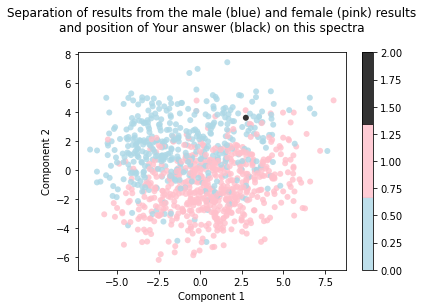

In [142]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors

plt_x = np.concatenate((x, user_data), axis=0)
plt_y = np.concatenate((y, np.array([2])), axis=0)

pca = PCA(2) 
projected = pca.fit_transform(plt_x)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightblue", "pink", "black"], N=3)

plt.scatter(projected[:, 0], projected[:, 1],
            c=plt_y, edgecolor='none', alpha=0.8,
            cmap=cmap)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Separation of results from the male (blue) and female (pink) results\n\
and position of Your answer (black) on this spectra\n')
plt.colorbar();

# Data overview

The graphs below show a comparison of the average score for different interests and hobbies, done by men and women. As one can see, there are interests that women have marked with a higher score (Reading, Shopping, Dancing), and there are interests that are more expressed in men's answers (Science and technology, PC, Cars).

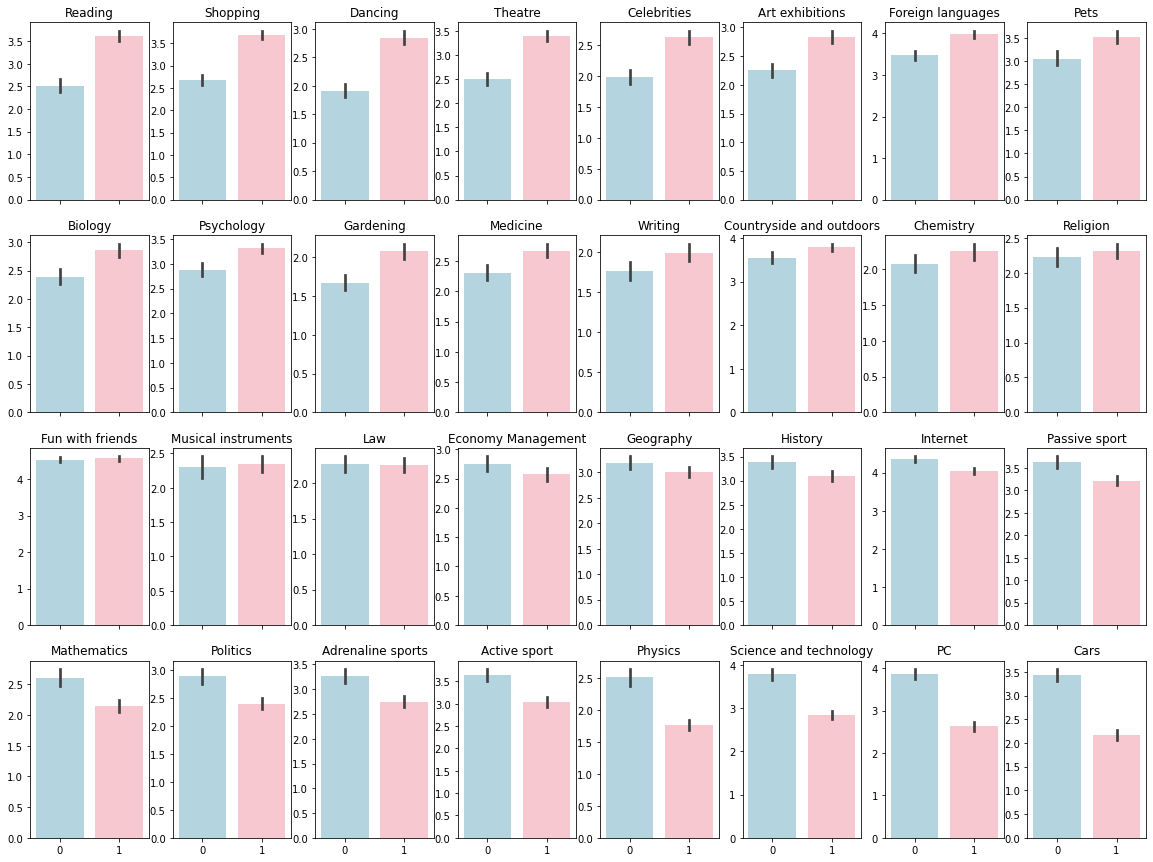

In [143]:
import seaborn as sns

main_columns = ['Reading', 'Shopping', 'Dancing', 'Theatre', 'Celebrities', 
                'Art exhibitions', 'Foreign languages', 'Pets', 'Biology',
                'Psychology', 'Gardening', 'Medicine', 'Writing', 'Countryside and outdoors',
                'Chemistry', 'Religion', 'Fun with friends', 'Musical instruments',
                'Law', 'Economy Management', 'Geography', 'History', 'Internet',
                'Passive sport', 'Mathematics', 'Politics', 'Adrenaline sports',
                'Active sport',	'Physics', 'Science and technology', 'PC', 'Cars']

nrows, ncols = 4, 8
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,15), sharex=True)
name_id=0
for row in range(nrows):
    for col in range(ncols):
        sns.barplot(y=main_columns[name_id], x='Gender', data=dataset, ax=ax[row,col], palette=['lightblue', 'pink'])
        ax[row,col].set_ylabel('')
        ax[row,col].set_xlabel('')
        ax[row,col].set_title(main_columns[name_id], fontsize=12)
        name_id += 1

# Simple classifiers

Before building neural networks, we can test how we can perform our task using simple classifiers like
- GaussianNB
- LinearDiscriminantAnalysis
- KNeighborsClassifier
- MLPClassifier

In [144]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(5)
#lf =  MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1, hidden_layer_sizes=[100, 100],early_stopping=True, verbose=10, tol=0.00001)

print(clf.fit(x_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(x_test)
expected = y_test


print(f"Score train = {round(clf.score(x_train, y_train)*100, 1)}%")
print(f"Score test  = {round(clf.score(x_test, y_test)*100, 1)}%")

from sklearn import metrics

print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))
plt.show()

GaussianNB()
Score train = 85.2%
Score test  = 84.0%
Confusion matrix:
[[ 56  15]
 [ 17 112]]


# Building a neural network

Here I build my neural network and check its structure. 

In [145]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(32,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,178
Trainable params: 2,178
Non-trainable params: 0
_________________________________________________________________


# Training a neural network

In [146]:
batch_size = 100
epochs = 60

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
8/8 [==============================] - 1s 27ms/step - loss: 1.6494 - accuracy: 0.4425 - val_loss: 1.0001 - val_accuracy: 0.3100
Epoch 2/60
8/8 [==============================] - 0s 6ms/step - loss: 1.0477 - accuracy: 0.4863 - val_loss: 0.7224 - val_accuracy: 0.5450
Epoch 3/60
8/8 [==============================] - 0s 7ms/step - loss: 0.8438 - accuracy: 0.5600 - val_loss: 0.6454 - val_accuracy: 0.6050
Epoch 4/60
8/8 [==============================] - 0s 6ms/step - loss: 0.7732 - accuracy: 0.5663 - val_loss: 0.6055 - val_accuracy: 0.6850
Epoch 5/60
8/8 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.6012 - val_loss: 0.5856 - val_accuracy: 0.7200
Epoch 6/60
8/8 [==============================] - 0s 6ms/step - loss: 0.6608 - accuracy: 0.6400 - val_loss: 0.5464 - val_accuracy: 0.7500
Epoch 7/60
8/8 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.6500 - val_loss: 0.5138 - val_accuracy: 0.7600
Epoch 8/60
8/8 [=================

# Checking neural network efficiency

Accuracy Train: 87.9%, Test: 86.5%
7/7 - 0s - 57ms/epoch - 8ms/step
[[ 57  14]
 [ 13 116]]


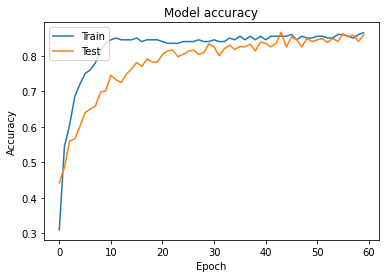

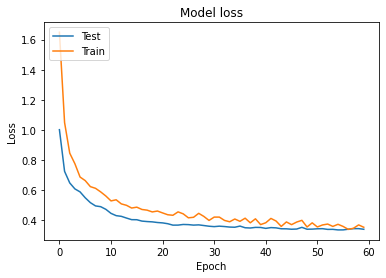

In [147]:
from sklearn import metrics

# evaluate the model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print(f"Accuracy Train: {round(scores_train[1]*100, 1)}%, Test: {round(scores_test[1]*100, 1)}%") 
      
# Confusion matrix result
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test, verbose=2)

#confusion matrix
#since y_pred has a shape(200,2) than argmax finds which output cell is bigger

cm = confusion_matrix((y_test+0.5).astype(int),np.argmax(y_pred,axis=1))
print(cm)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Test', 'Train'], loc='upper left') 
plt.show()

In [148]:
predictions = model.predict(user_data)
chance = round(predictions[0][0]*100, 1)
print(f"Chances that You are male are {chance}%")
print(f"Chances that You are female are {round(100-chance, 1)}%\n")
print(f"So my guess is that You are {['male', 'female'][float(chance)<50]}")

1/1 [==============================] - 0s 21ms/step
Chances that You are male are 86.4%
Chances that You are female are 13.6%

So my guess is that You are male


# Conclusion

- While doing this task, I realized that I could analyze datasets and create neural networks for my needs
- I have created and imported a dataset and analyzed it, using both simple classificators and neural network classification.
- The efficiency of neural network classification and simple classificators are in the same range (~85%).